In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from random import randint, choice


In [2]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.model_selection import train_test_split

In [47]:
%matplotlib notebook

In [128]:
rgen = np.random.RandomState(47)

x1 = rgen.normal(loc=80.0,scale=10.0, size= 42)
y1 = rgen.normal(loc=50.0,scale=18.0, size= 42)

x2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
y2 = rgen.normal(loc=30.0,scale=8.0, size= 42)

x3 = rgen.normal(loc=100.0,scale=8.0, size= 42)
y3 = rgen.normal(loc=70.0,scale=8.0, size= 42)

x4 = rgen.normal(loc=30.0,scale=8.0, size= 21)
y4 = rgen.normal(loc=80.0,scale=8.0, size= 21)

x4_1 = rgen.normal(loc=110.0,scale=8.0, size= 21)
y4_1 = rgen.normal(loc=20.0,scale=8.0, size= 21)

x5 = rgen.normal(loc=65.0,scale=50.0, size= 42)
y5 = rgen.normal(loc=50.0,scale=50.0, size= 42)

k1 = np.array([x1, y1])
k2 = np.array([x2, y2])
k3 = np.array([x3, y3])
k4 = np.array([ np.concatenate((x4, x4_1) , axis=0) , np.concatenate((y4, y4_1) , axis=0) ]) 
k5 = np.array([x5, y5])

<IPython.core.display.Javascript object>


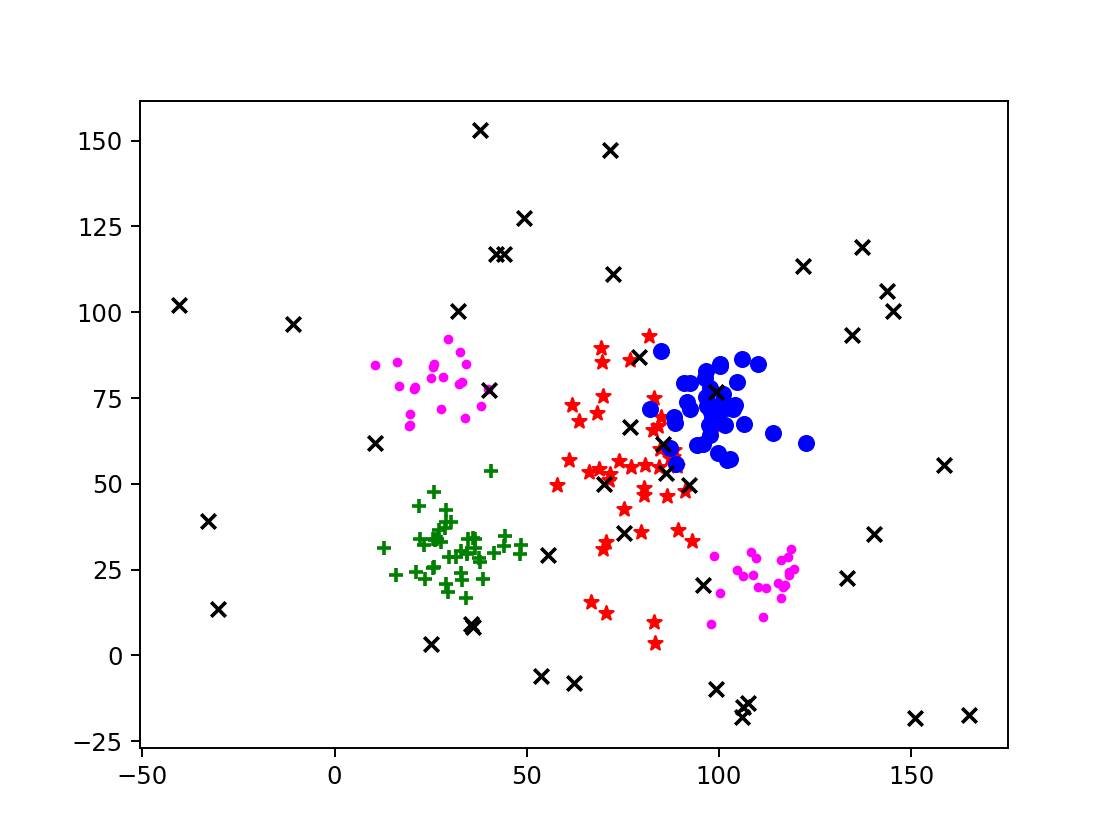

In [167]:
plt.scatter(k1[0], k1[1],  color='red', marker='*', label='class 1')
plt.scatter(k2[0], k2[1],  color='green', marker='+', label='class 2')
plt.scatter(k3[0], k3[1],  color='blue', marker='o', label='class 3')
plt.scatter(k4[0], k4[1],  color='magenta', marker='.', label='class 4')
plt.scatter(k5[0], k5[1],  color='black', marker='x', label='class 5')
#plt.axis('off')
plt.show()

In [132]:
xx = 42
ii = [xx * i for i in range(1, 5+1)]
ii

[42, 84, 126, 168, 210]

In [168]:
X = np.zeros( (42*5,2) )
X[:42] = k1.T
X[42:84] = k2.T
X[84:126] = k3.T
X[126:168] = k4.T
X[168:] = k5.T
X /= 100 


In [134]:
y = np.zeros( (42*5), dtype=int )
y[42:] += 1
y[84:] += 1
y[126:] += 1
y[168:] += 1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1, stratify=y )


In [162]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state = 1 )


In [163]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

<IPython.core.display.Javascript object>


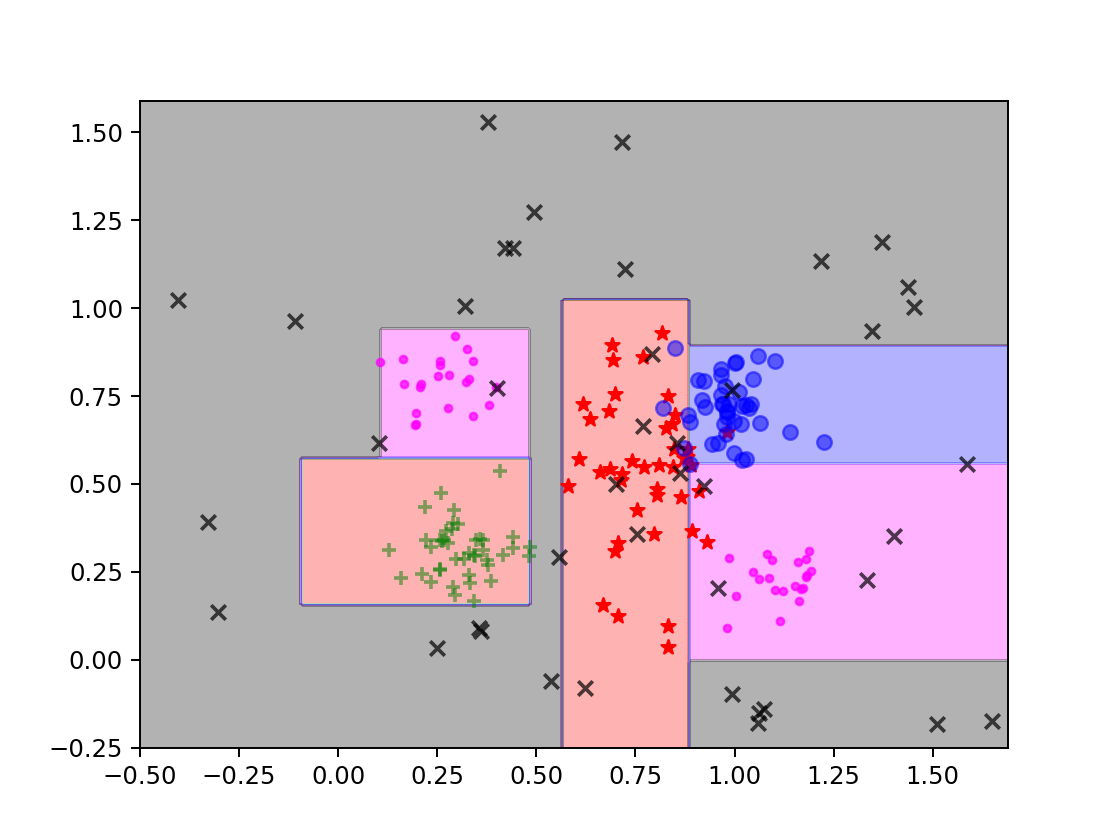

In [166]:
kg1 = k1.copy()/100
kg2 = k2.copy()/100
kg3 = k3.copy()/100
kg4 = k4.copy()/100
kg5 = k5.copy()/100

x1_min, x1_max = -.5,1.7
x2_min, x2_max = -0.25,1.6
resol = 0.01

cmap = ListedColormap(['red', 'green','blue', 'magenta', 'black'])

xx1, xx2 = np.meshgrid(
                       np.arange(x1_min, x1_max, resol), 
                       np.arange(x2_min, x2_max, resol) 
                      )

Z = tree.predict(
                np.array([xx1.ravel(), xx2.ravel()] ).T
                )
Z = Z.reshape(xx1.shape)

plt.contourf( xx1, xx2, Z, alpha=0.3, cmap=cmap )
plt.scatter(kg1[0], kg1[1],  color='red', marker='*', label='class 1')
plt.scatter(kg2[0], kg2[1],  color='green', marker='+', label='class 2', alpha=0.5)
plt.scatter(kg3[0], kg3[1],  color='blue', marker='o', label='class 3', alpha=0.5)
plt.scatter(kg4[0], kg4[1],  color='magenta', marker='.', label='class 4', alpha=0.7)
plt.scatter(kg5[0], kg5[1],  color='black', marker='x', label='class 5', alpha=0.7)
#Qplt.xlim([0.75, 0.95])
#plt.ylim([0.5, 0.9])
#plt.axis('off')
plt.show()